In [160]:
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow as tf
import seaborn as sns
import plotly.express as px
from pylab import rcParams
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import plotly.graph_objs as go


In [107]:
%matplotlib inline  
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 22, 10

In [96]:
# Load historical apple stock data daily prices from yahoo fin

df = pd.read_csv("AAPL.csv")

df['Date'] = pd.to_datetime(df['Date'])
df.set_axis(df['Date'], inplace=True)
df.drop(columns=['Open', 'High', 'Low', 'Volume'], inplace=True)

<AxesSubplot:xlabel='Date', ylabel='Close'>

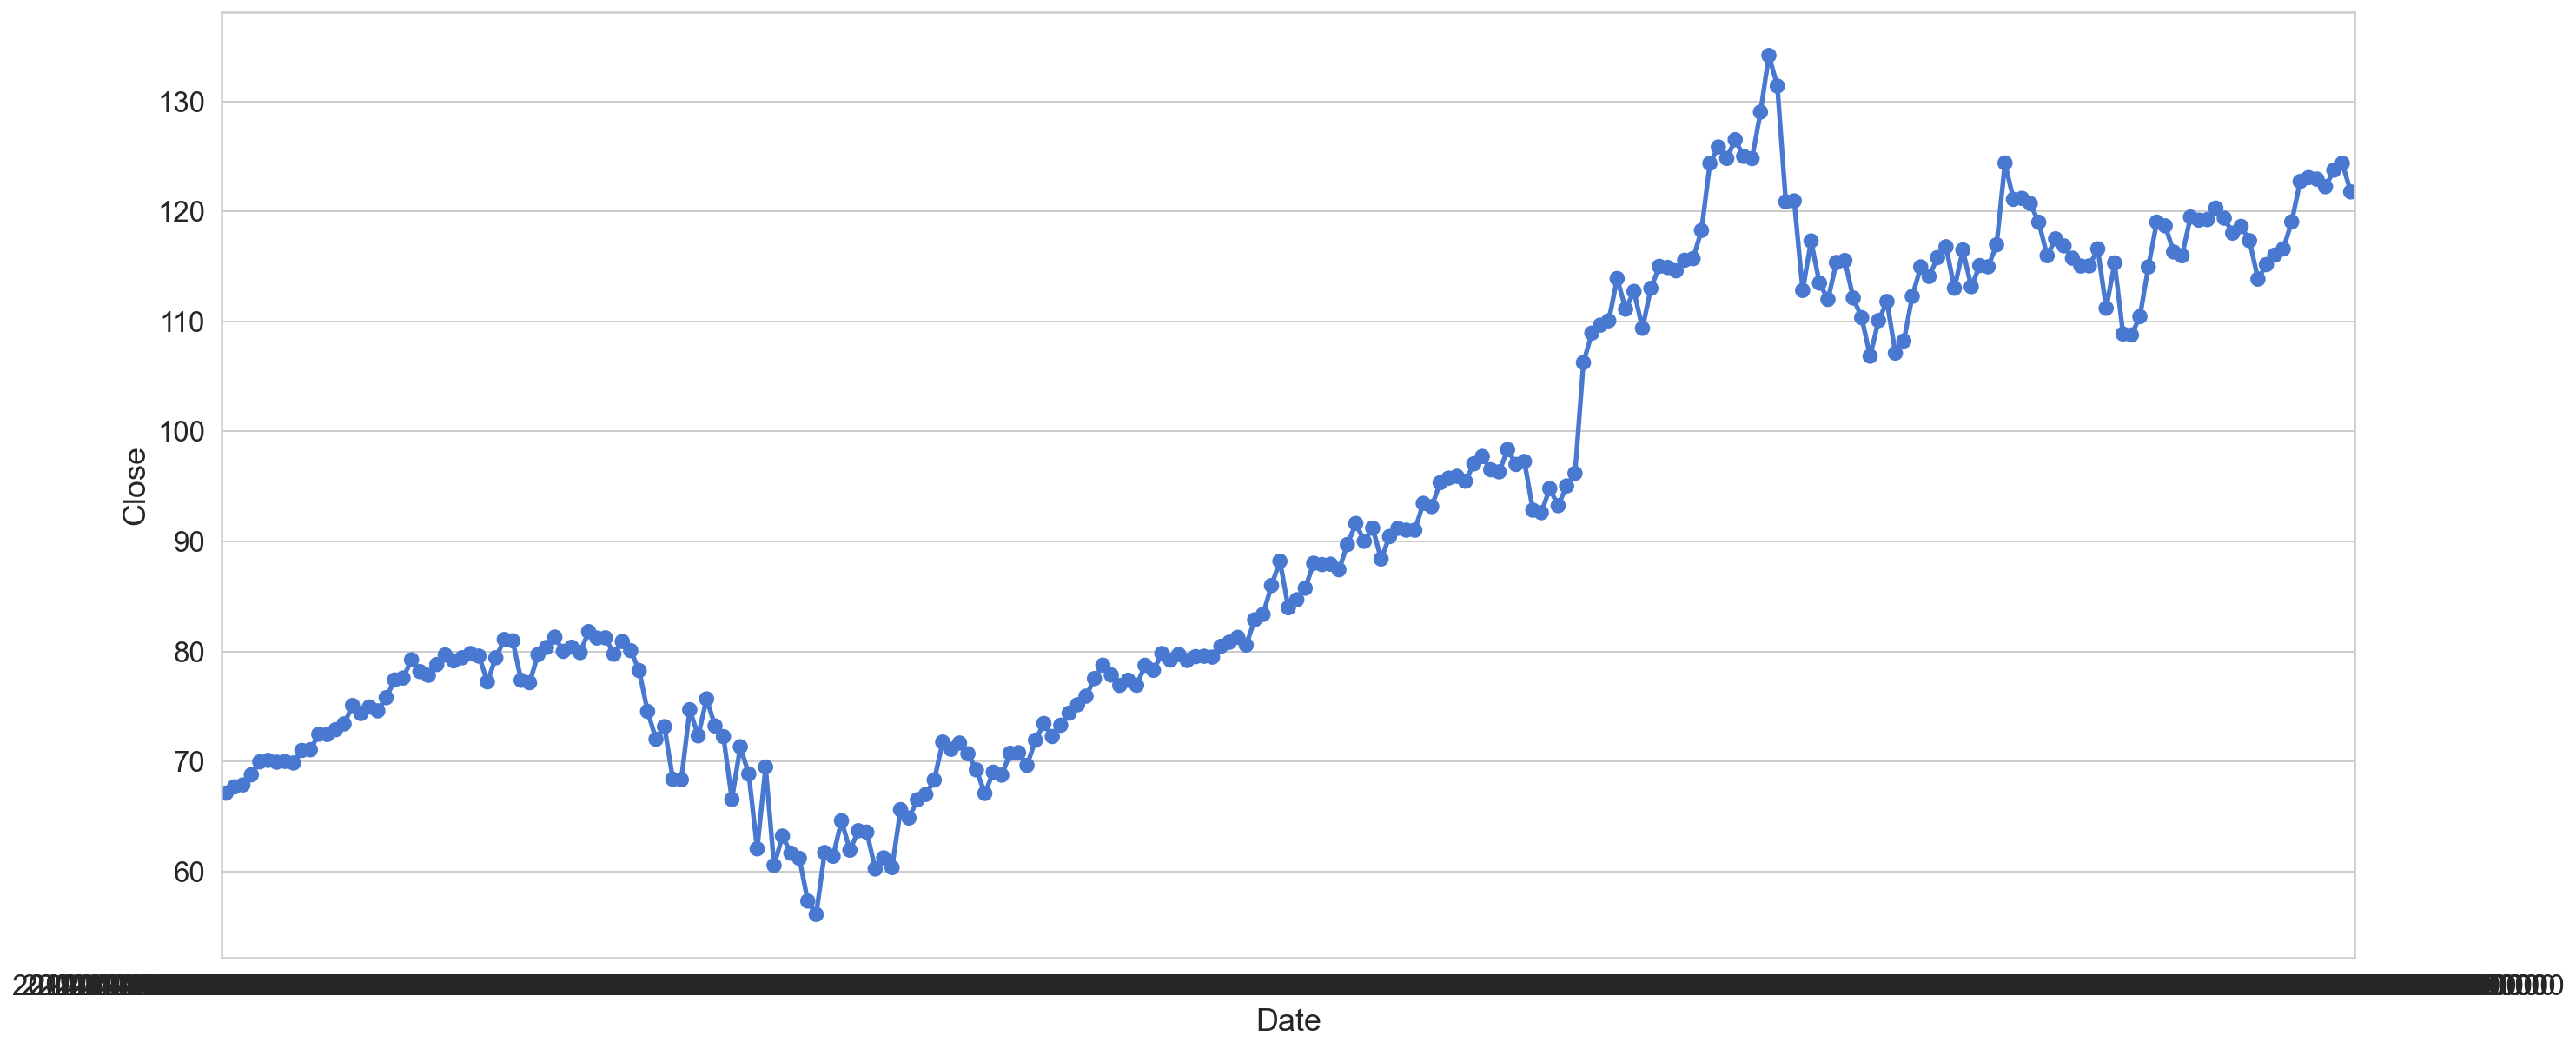

In [108]:
sns.pointplot(data=df, x='Date', y='Close')

In [129]:
close_data = df['Close'].values
close_data = close_data.reshape((-1,1))

# we want to train 80% of the data set and test with 20%
split_percent = 0.80
split = int(split_percent*len(close_data))

close_train = close_data[:split]
close_test = close_data[split:]

date_train = df['Date'][:split]
date_test = df['Date'][split:]

print(close_train.shape)
print(close_test.shape)

(202, 1)
(51, 1)


In [131]:
look_back = 15

train_generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(close_train, close_train, length=look_back, batch_size=20)     
test_generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(close_test, close_test, length=look_back, batch_size=1)

In [133]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(
    LSTM(10,
        activation='relu',
        input_shape=(look_back,1))
)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

num_epochs = 25
model.fit_generator(train_generator, epochs=num_epochs, verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
10/10 [==============================] - 0s 6ms/step - loss: 7168.7231
Epoch 2/25
10/10 [==============================] - 0s 5ms/step - loss: 6823.9722
Epoch 3/25
10/10 [==============================] - 0s 5ms/step - loss: 6691.9497
Epoch 4/25
10/10 [==============================] - 0s 5ms/step - loss: 6597.5962
Epoch 5/25
10/10 [==============================] - 0s 5ms/step - loss: 6481.2773
Epoch 6/25
10/10 [==============================] - 0s 5ms/step - loss: 5096.2480
Epoch 7/25
10/10 [==============================] - 0s 5ms/step - loss: 1771.6494
Epoch 8/25
10/10 [==============================] - 0s 5ms/step - loss: 413.9896
Epoch 9/25
10/10 [==============================] - 0s 5ms/step - loss: 300.1534
Epoch 10/25
10/10 [==============================] - 0s 5ms/step - loss: 166.5088
Epoch 11/25
10/10 [==============================] - 0s 5ms/step - loss: 92.2121
Epoch 12/25
10/10 [======

In [1]:
prediction = model.predict_generator(test_generator)

close_train = close_train.reshape((-1))
close_test = close_test.reshape((-1))
prediction = prediction.reshape((-1))


trace1 = plt.scatter(
    x = date_train,
    y = close_train,
    
)
trace2 = plt.scatter(
    x = date_test,
    y = prediction,

)
trace3 = plt.scatter(
    x = date_test,
    y = close_test,

)
layout = plt.scatter(
    title = "Google Stock",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = plt.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()



NameError: name 'model' is not defined